In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
df = pd.read_csv('dataset.csv')

C:\Users\ML\Anaconda3\envs\me\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,날짜,역번호,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,...,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,24~
0,2008-01-01,150,서울역(150),승차,379,287,371,876,965,"1,389",...,"2,520","3,078","3,495","3,055","2,952","2,726","3,307","2,584","1,059",264
1,2008-01-01,150,서울역(150),하차,145,707,689,"1,037","1,170","1,376",...,"1,955","2,304","2,203","2,128","1,747","1,593","1,078",744,406,558
2,2008-01-01,151,시청(151),승차,131,131,101,152,191,202,...,892,900,"1,154","1,706","1,444","1,267",928,531,233,974
3,2008-01-01,151,시청(151),하차,35,158,203,393,375,460,...,"1,157","1,153","1,303","1,190",830,454,284,141,107,185
4,2008-01-01,152,종각(152),승차,"1,287",867,400,330,345,338,...,"1,867","2,269","2,777","2,834","2,646","2,784","2,920","2,290",802,"1,559"


In [4]:
df.columns

Index([' 날짜 ', ' 역번호 ', ' 역명 ', ' 구분 ', ' 05~06 ', ' 06~07 ', ' 07~08 ',
       ' 08~09 ', ' 09~10 ', ' 10~11 ', ' 11~12 ', ' 12~13 ', ' 13~14 ',
       ' 14~15 ', ' 15~16 ', ' 16~17 ', ' 17~18 ', ' 18~19 ', ' 19~20 ',
       ' 20~21 ', ' 21~22 ', ' 22~23 ', ' 23~24 ', ' 24~ '],
      dtype='object')

In [5]:
df[' 역명 ']

0               서울역(150) 
1               서울역(150) 
2                시청(151) 
3                시청(151) 
4                종각(152) 
5                종각(152) 
6              종로3가(153) 
7              종로3가(153) 
8              종로5가(154) 
9              종로5가(154) 
10              동대문(155) 
11              동대문(155) 
12              신설동(156) 
13              신설동(156) 
14              제기동(157) 
15              제기동(157) 
16          청량리(지하)(158) 
17          청량리(지하)(158) 
18              동묘앞(159) 
19              동묘앞(159) 
20               시청(201) 
21               시청(201) 
22            을지로입구(202) 
23            을지로입구(202) 
24            을지로3가(203) 
25            을지로3가(203) 
26            을지로4가(204) 
27            을지로4가(204) 
28           동대문운동장(205) 
29           동대문운동장(205) 
                ...      
1922006              강동구청
1922007              강동구청
1922008              몽촌토성
1922009              몽촌토성
1922010             잠실(8)
1922011             잠실(8)
1922012                석촌
1922013     

In [6]:
s = df[' 역명 ']

In [7]:
s = set(s)

In [8]:
len(s)

547

In [9]:
s = list(s)
# s = list(set(df[' 역명 ']))

In [10]:
s

[' 장지 ',
 '매봉(333)',
 '종로3가(5)',
 ' 양재(332) ',
 '선릉(220)',
 ' 명동(424) ',
 ' 노원(7) ',
 ' 상계(410) ',
 ' 뚝섬(210) ',
 '까치산(5)',
 '애오개',
 '굽은다리',
 ' 낙성대(227) ',
 '발산',
 ' 명일 ',
 '학여울(336)',
 '총신대입구(432)',
 ' 강남구청 ',
 '개롱',
 ' 천왕 ',
 ' 먹골 ',
 '홍대입구(239)',
 ' 반포 ',
 '옥수(325)',
 '서울대입구(228)',
 '신흥',
 '태릉입구(6)',
 '신대방(231)',
 '영등포구청(236)',
 '남성',
 '미아삼거리(416)',
 ' 길음(417) ',
 ' 청구(5) ',
 ' 군자(5) ',
 ' 청담 ',
 '상계(410)',
 ' 천호(8) ',
 ' 신당(206) ',
 '역삼(221)',
 '청량리(지하)(158)',
 ' 신정네거리(249) ',
 '논현',
 ' 도곡(334) ',
 '마천',
 '장한평',
 '산성',
 '상월곡',
 '창신',
 ' 어린이대공원 ',
 '숭실대입구',
 ' 동작(431) ',
 '아현(242)',
 '신설동(156)',
 '불광(312)',
 '대흥',
 ' 송정 ',
 '숙대입구(427)',
 '종로3가(319)',
 ' 삼성(219) ',
 ' 삼각지(6) ',
 '봉천(229)',
 ' 신정 ',
 ' 영등포구청(236) ',
 ' 충정로(5) ',
 ' 장암 ',
 ' 신대방(231) ',
 ' 을지로4가(204) ',
 ' 공덕(5) ',
 '강변(214)',
 '신당(6)',
 ' 신촌(240) ',
 '독립문(316)',
 '경복궁(317)',
 '동대입구(322)',
 '도곡(334)',
 ' 사당(433) ',
 '녹번(313)',
 ' 학여울(336) ',
 ' 합정(6) ',
 ' 삼각지(428) ',
 ' 동대문(155) ',
 ' 광명사거리 ',
 ' 대림(7) ',
 ' 한양대(209) 

In [11]:
data1 = df[df[' 역명 ']==s[0]]

In [12]:
data1

,날짜,역번호,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,...,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,24~
508,2008-01-01,2820,장지,승차,19,50,24,44,60,64,...,86,77,100,67,44,48,56,94,6,0
1032,2008-01-02,2820,장지,승차,34,97,346,454,173,135,...,135,165,709,656,220,98,90,65,40,11
1556,2008-01-03,2820,장지,승차,35,112,318,445,211,129,...,154,172,832,730,206,115,110,67,46,18
2080,2008-01-04,2820,장지,승차,39,93,381,428,216,153,...,146,229,929,705,255,129,100,78,42,6
2604,2008-01-05,2820,장지,승차,28,64,82,220,220,139,...,228,265,810,396,160,75,74,42,23,0
3128,2008-01-06,2820,장지,승차,24,45,53,102,100,108,...,145,205,213,127,86,34,54,26,11,0
3652,2008-01-07,2820,장지,승차,37,107,369,428,184,129,...,126,199,799,788,273,113,156,69,25,7
4176,2008-01-08,2820,장지,승차,39,105,347,409,209,125,...,167,239,882,721,264,109,121,87,24,9
4700,2008-01-09,2820,장지,승차,27,96,360,429,181,138,...,175,242,925,686,258,137,110,47,33,7
5224,2008-01-10,2820,장지,승차,35,109,361,430,205,127,...,154,196,897,739,245,121,128,74,37,5


In [13]:
data1_a = data1[' 05~06 ']

In [14]:
data1_a

508       19 
1032      34 
1556      35 
2080      39 
2604      28 
3128      24 
3652      37 
4176      39 
4700      27 
5224      35 
5748      38 
6272      35 
6796      20 
7320      34 
7844      35 
8368      41 
8892      42 
9416      50 
9940      40 
10464     24 
10988     34 
11512     45 
12036     40 
12560     48 
13084     42 
13608     38 
14132     21 
14656     44 
15180     49 
15704     54 
         ... 
176904    82 
177430    91 
177956    75 
178482    77 
179008    52 
179534    21 
180060    75 
180586    72 
181112    79 
181638    66 
182164    80 
182690    61 
183216    45 
183742    68 
184268    76 
184794    73 
185320    72 
185846    86 
186372    69 
186898    34 
187424    68 
187950    55 
188476    71 
189002    47 
189528    64 
190054    60 
190580    40 
191106    57 
191632    55 
192158    63 
Name:  05~06 , Length: 366, dtype: object

In [15]:
data1_a = data1[' 05~06 '].values

In [16]:
type(data1_a)

numpy.ndarray

In [17]:
data1_a = data1_a.reshape(len(data1_a), 1)
data1_a

array([['19 '],
       ['34 '],
       ['35 '],
       ['39 '],
       ['28 '],
       ['24 '],
       ['37 '],
       ['39 '],
       ['27 '],
       ['35 '],
       ['38 '],
       ['35 '],
       ['20 '],
       ['34 '],
       ['35 '],
       ['41 '],
       ['42 '],
       ['50 '],
       ['40 '],
       ['24 '],
       ['34 '],
       ['45 '],
       ['40 '],
       ['48 '],
       ['42 '],
       ['38 '],
       ['21 '],
       ['44 '],
       ['49 '],
       ['54 '],
       ['42 '],
       ['41 '],
       ['34 '],
       ['23 '],
       ['38 '],
       ['39 '],
       ['23 '],
       ['18 '],
       ['17 '],
       ['27 '],
       ['23 '],
       ['55 '],
       ['35 '],
       ['51 '],
       ['40 '],
       ['57 '],
       ['35 '],
       ['28 '],
       ['51 '],
       ['38 '],
       ['38 '],
       ['35 '],
       ['41 '],
       ['43 '],
       ['18 '],
       ['53 '],
       ['48 '],
       ['61 '],
       ['50 '],
       ['48 '],
       ['40 '],
       ['26 '],
       [

In [18]:
# 데이터셋 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(data1_a)

C:\Users\ML\Anaconda3\envs\me\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
train_size = int(len(signal_data) * 0.80)
test_size = len(signal_data) - train_size

In [20]:
train = signal_data[0:train_size]
test = signal_data[train_size:len(signal_data)]

In [21]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data) - look_back):
        dataX.append(signal_data[i:(i + look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10

In [22]:
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

In [23]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [24]:
# 모델 구성하기
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))

In [25]:
# 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])

In [26]:
# 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
282/282 [==============================] - 1s 3ms/step - loss: 0.1147 - acc: 0.0035
Epoch 2/10
282/282 [==============================] - 0s 153us/step - loss: 0.0365 - acc: 0.0035
Epoch 3/10
282/282 [==============================] - 0s 142us/step - loss: 0.0335 - acc: 0.0035
Epoch 4/10
282/282 [==============================] - 0s 135us/step - loss: 0.0363 - acc: 0.0035
Epoch 5/10
282/282 [==============================] - 0s 135us/step - loss: 0.0317 - acc: 0.0035
Epoch 6/10
282/282 [==============================] - 0s 133us/step - loss: 0.0329 - acc: 0.0000e+00
Epoch 7/10
282/282 [==============================] - 0s 142us/step - loss: 0.0317 - acc: 0.0035
Epoch 8/10
282/282 [==============================] - 0s 128us/step - loss: 0.0317 - acc: 0.0035
Epoch 9/10
282/282 [==============================] - 0s 138us/step - loss: 0.0313 - acc: 0.0035
Epoch 10/10
282/282 [==============================] - 0s 131us/step - loss: 0.0313 - acc: 0.0035


In [27]:
# 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)

testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

Train Score:  [0.026119123880110735, 0.0035460992907801418]
Test Score:  [0.04482670687139034, 0.015625]


In [28]:
# 정확도 그리기.
p = model.predict(x_test)

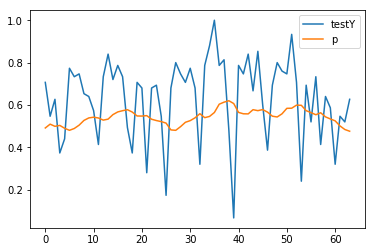

In [29]:
import matplotlib.pyplot as plt

plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.show()